# HW 4 - Metrics & Project Pipelines Start

by, K. Thach

## Metrics 

1. For the data shown in the table, find the number of 
    * True positives 
    * False positives
    * True negatives
    * False negatives
2. Find the precision and recall.
3. Plot a ROC curve.
4. What is the minimum False Positive Rate you can achieve (by varying the threshold), if you must correctly detect at least 90% of all actual positives?  



In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('hw4_data.csv')
df.head()

,model_output,prediction,true_class
0,6.039733,1,1
1,2.450787,0,0
2,2.417883,0,1
3,-0.451535,0,0
4,1.173396,0,0


In [7]:
model_output = df['model_output'].to_numpy()
prediction = df['prediction'].to_numpy()
true_class = df['true_class'].to_numpy()

In [ ]:
def true_positives(prediction,true_class):
    count = 0
    for p, t in zip(prediction,true_class):

        if p == 1 and t == 1:
            count +=1
    return count

def false_positives(prediction,true_class):
    count = 0
    for p, t in zip(prediction,true_class):

        if p == 1 and t == 0:
            count +=1
    return count

def true_negatives(prediction,true_class):
    count = 0
    for p, t in zip(prediction,true_class):

        if p == 0 and t == 0:
            count +=1
    return count

def false_negatives(prediction,true_class):
    count = 0
    for p, t in zip(prediction,true_class):

        if p == 0 and t == 1:
            count +=1
    return count
    
    

In [10]:
tp = true_positives(prediction,true_class)
fp = false_positives(prediction,true_class)
tn = true_negatives(prediction,true_class)
fn = false_negatives(prediction,true_class)


print(f"The number of true positives is {tp}")
print(f"The number of false positives is {fp}")
print(f"The number of true negatives is {tn}")
print(f"The number of false negatives is {fn}")

The number of true positives is 26
The number of false positives is 3
The number of true negatives is 150
The number of false negatives is 21


In [14]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print(f"Precision is {precision:.4f}")
print(f"Recall is {recall:.4f}")

Precision is 0.8966
Recall is 0.5532


In [17]:
TPR = tp/(tp+fn)
FPR = fp/(fp+tn)
print(f"True Positive Rate is {TPR:.4f}")
print(f"False Positive Rate is {FPR:.4f}")

True Positive Rate is 0.5532
False Positive Rate is 0.0196


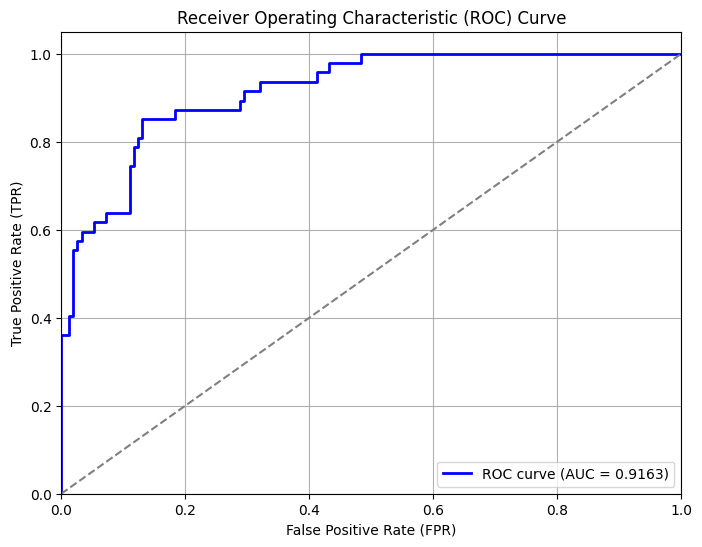

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(true_class, model_output)

roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--") 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the minimum FPR where TPR is at least 90%
min_fpr_at_90_tpr = min(fpr[tpr >= 0.90])
print(min_fpr_at_90_tpr)

0.29411764705882354


## Project Pipeline Start

* The target image class in this project is **Dogs**. 
* The number of parameters in this model 26,367,813 (I feel like I may need to downsize this a bit later) -- set next code line for `model_summary()`
* Training and testing accuracy is as follows:

### Number of Images in Datasets

| Dataset  | # of Pos | # of Neg |
|----------|----------|----------|
| Train    | 4        | 4        |
| Valid    | 1        | 1        |
| Test     | 5        | 1        |
| Total    | 10       | 6        |


In [30]:
%run train.py

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


/Users/pkth002/Documents/Machine-Learning-for-IoT-main/_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 0.2667 - loss: 2.6602 - val_accuracy: 0.5000 - val_loss: 2.2652
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.8333 - loss: 2.5715 - val_accuracy: 0.5000 - val_loss: 7.1338
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 1.0000 - loss: 3.0785e-09 - val_accuracy: 1.0000 - val_loss: 2.2280e-07
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 1.0000 - loss: 3.9383e-10 - val_accuracy: 1.0000 - val_loss: 8.3703e-08
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 1.0000 - loss: 1.8915e-05 - val_accuracy: 1.0000 - val_loss: 2.6390e-05


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 26,367,813 (100.59 MB)

 Trainable params: 8,036,609 (30.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 16,073,220 (61.31 MB)

None
Training complete. Model saved as dog_detector.h5


### Model Evaluation

In [32]:
%run eval.py

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Total test images processed: 6
Accuracy: 0.3333
Precision: 1.0000
Recall: 0.3333
F1 Score: 0.5000
